# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

from matplotlib import pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [4]:
# import the dataset
employee = pd.read_csv('../100_LABS/MODULE_2/lab-pivot-table-and-correlation/your_code/data/Employee.csv')

In [5]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [6]:
# Method 1 - Group by:
# Group by department and calculate the mean
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [7]:
# Method 2 - Pivot table
# The function calculates the mean by default
employee.pivot_table(index = 'Department', values = 'Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [26]:
# Select the columns Department and Title to group by
employee.pivot_table(index = ['Department', 'Title'], values = ['Salary'])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [10]:
# add years in the values column
employee.pivot_table(index = [ 'Title'], columns = ['Years'], values = ['Salary'])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [18]:
# Breaking the conditions of our question:
# 1. mean of salary
# 2. count of salaries
# 3. Gouped by department and job
employee.pivot_table(index = ['Department', 'Title'], values = ['Salary'], aggfunc = ['mean', 'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [13]:
# Breaking the conditions of our question:
# 1. median, minimum, maximum and standard deviation --> salary
# 2. Gouped by department and job title
employee.pivot_table(index = ['Department', 'Title'], values = ['Salary'], aggfunc = ['min','median', 'max', 'std'])

# Comment:
# For the title jobs that only have one worker, it's not possible to calculate std (nor makes sense)

min median    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP            70   70.0     70       NaN
           analyst       30   32.5     35  3.535534
IT         VP            70   70.0     70       NaN
           analyst       30   32.5     35  3.535534
           associate     60   60.0     60       NaN
Sales      associate     55   55.0     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [15]:
# std = 0 for all the missing values
employee_f = employee.pivot_table(index = ['Department', 'Title'], values = ['Salary'], aggfunc = ['min','median', 'max', 'std'])
# Fill the missing values with 0
employee_f = employee_f.fillna(0)
employee_f

min median    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP            70   70.0     70  0.000000
           analyst       30   32.5     35  3.535534
IT         VP            70   70.0     70  0.000000
           analyst       30   32.5     35  3.535534
           associate     60   60.0     60  0.000000
Sales      associate     55   55.0     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [17]:
# Breaking the conditions of our question:
# 1. sum of salary
# 2. count of salaries
# 3. Gouped by department
employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = ['sum', 'count'])

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [22]:
# Breaking the conditions of our question:
# 1. sum of salary
# 2. count of salaries
# 3. Gouped by department and job title
employee.pivot_table(index = ['Department', 'Title'], values = ['Salary', 'Years'], aggfunc = {'Years':'sum', 'Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [41]:
# 1. Find all max values for each department
max = employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = ['max'])
# 2. Drop the rows with max and compute the mean
#def without_max(dataframe):
#    dataf = employee.merge(dataframe)
max

,max
,Salary
Department,
HR,70
IT,70
Sales,55


In [ ]:
employee.merge(max, on='Salary', how='right')

TypeError: Can only merge Series or DataFrame objects, a <class 'builtin_function_or_method'> was passed

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [2]:
# import the dataset
fitbit = pd.read_csv('../MODULE_2/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [3]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [4]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

<AxesSubplot:>

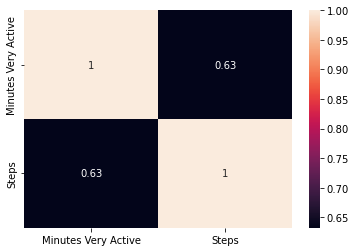

In [12]:
# your answer here
#corr_1 = fitbit[['Minutes Very Active', 'Steps']].corr()       # by default is usin pearson
corr_2 = fitbit[['Minutes Very Active', 'Steps']].corr(method = 'spearman') # The method that has higher correlation
#corr_3 = fitbit[['Minutes Very Active', 'Steps']].corr(method = 'kendall')

#sns.heatmap(corr_1, annot= True, xticklabels=corr_1.columns, yticklabels=corr_1.columns)
sns.heatmap(corr_2, annot = True, xticklabels=corr_2.columns, yticklabels=corr_2.columns)
#sns.heatmap(corr_3, annot= True, xticklabels=corr_3.columns, yticklabels=corr_3.columns)

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

<AxesSubplot:xlabel='Minutes Very Active', ylabel='Steps'>

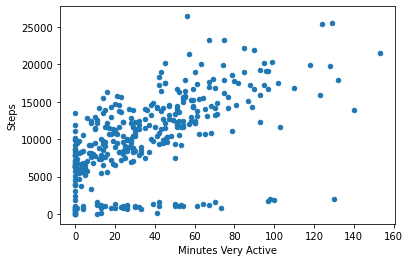

In [11]:
# your answer here
fitbit.plot.scatter(x= 'Minutes Very Active', y= 'Steps')

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# as the number of steps increase we can also see that there is a tendency for the number of minutes very active


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

<AxesSubplot:>

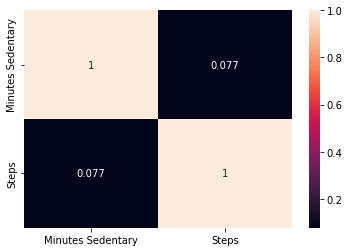

In [19]:
corr_1 = fitbit[['Minutes Sedentary', 'Steps']].corr()       # by default is usin pearson
corr_2 = fitbit[['Minutes Sedentary', 'Steps']].corr(method = 'spearman') 
corr_3 = fitbit[['Minutes Sedentary', 'Steps']].corr(method = 'kendall')

sns.heatmap(corr_1, annot= True, xticklabels=corr_1.columns, yticklabels=corr_1.columns)
#sns.heatmap(corr_2, annot = True, xticklabels=corr_2.columns, yticklabels=corr_2.columns)
#sns.heatmap(corr_3, annot= True, xticklabels=corr_3.columns, yticklabels=corr_3.columns)

# The value of correlation is very little

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<AxesSubplot:xlabel='Minutes Sedentary', ylabel='Steps'>

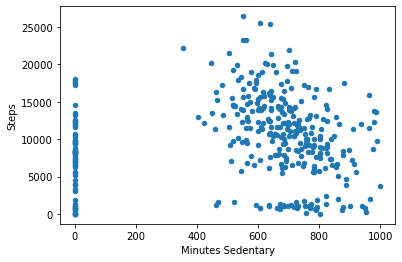

In [18]:
fitbit.plot.scatter(x= 'Minutes Sedentary', y= 'Steps')
# They don't have a correlation

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

<AxesSubplot:>

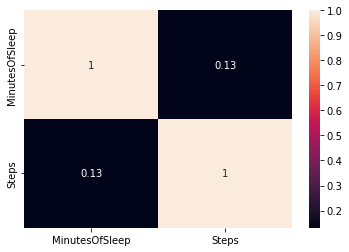

In [23]:
corr_1 = fitbit[['MinutesOfSleep', 'Steps']].corr()       # by default is usin pearson

sns.heatmap(corr_1, annot= True, xticklabels=corr_1.columns, yticklabels=corr_1.columns)

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<AxesSubplot:xlabel='Minutes Sedentary', ylabel='Steps'>

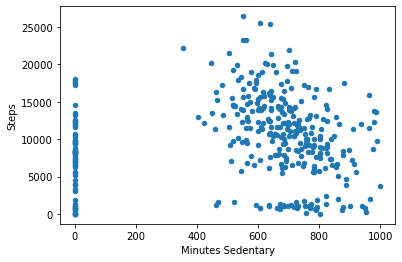

In [24]:
fitbit.plot.scatter(x= 'Minutes Sedentary', y= 'Steps')
# The value of correlation is very small 

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

<AxesSubplot:>

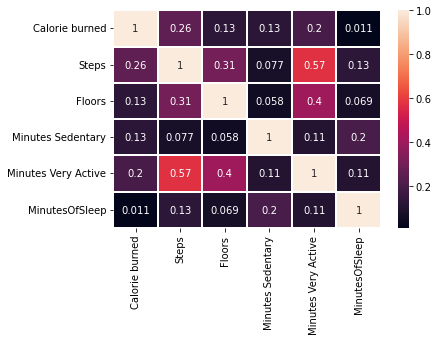

In [32]:
# Create new dataset
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column]

cor_fit = cor_fit.corr() 
sns.heatmap(cor_fit, annot= True, xticklabels=cor_fit.columns, yticklabels=cor_fit.columns, linewidths=2)


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [40]:
cor_fit = cor_fit.sort_values('Steps')
cor_fit['Steps']

# the variables that have a higher correlation with 'Steps' are 'Minutes Very Active', 'Floors'
# and we can also consider 'Calorie burned' althought it has a low value of correlation

Minutes Sedentary      0.076906
MinutesOfSleep         0.130986
Calorie burned         0.255305
Floors                 0.306511
Minutes Very Active    0.571452
Steps                  1.000000
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [2]:
# import the dataset
time_grades = pd.read_csv('/Users/ritaoliveira/Documents/Curso_Ironhack/100_LABS/MODULE_2/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv')

#### Show visually the frequency distribution of the time_grades dataset.

array([[<AxesSubplot:title={'center':'Study time'}>,
        <AxesSubplot:title={'center':'Grade'}>]], dtype=object)

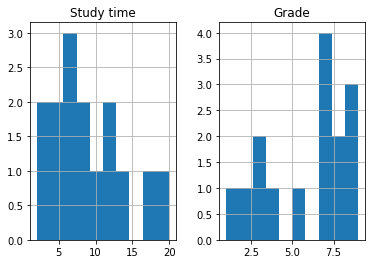

In [7]:
# your answer here
time_grades.hist()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

<AxesSubplot:>

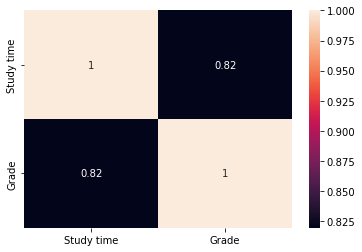

In [12]:
# calculate correlation spearman
corr_spear = time_grades[['Study time', 'Grade']].corr(method = 'spearman') # The method that has higher correlation

sns.heatmap(corr_spear, annot = True, xticklabels=corr_spear.columns, yticklabels=corr_spear.columns)

<AxesSubplot:>

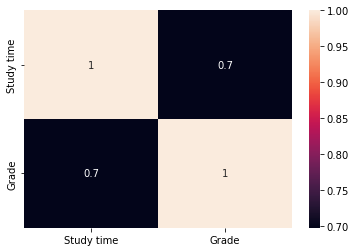

In [13]:
# calculate correlation kendal
corr_kend = time_grades[['Study time', 'Grade']].corr(method = 'kendall')

sns.heatmap(corr_kend, annot= True, xticklabels=corr_kend.columns, yticklabels=corr_kend.columns)

In [ ]:
# We can say that there is a correlation between the amount of time studding and grades because
# the value of correlation is very high.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<AxesSubplot:xlabel='Study time', ylabel='Grade'>

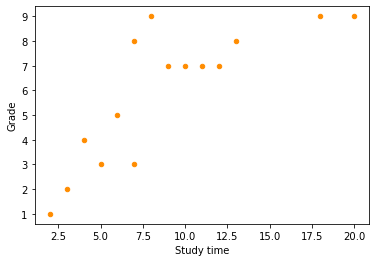

In [16]:
# your answer here
time_grades.plot(kind='scatter',x='Study time',y='Grade',color='darkorange')

# There is a tendency to higher grades, when the person spends more time studding

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# Pearson correlation evaluates the linear relationship between two continuous variables
# and Spearman correlation evaluates the monotonic relationship.
# The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.